<a href="https://colab.research.google.com/github/Mhtag/applied_statistics/blob/main/outlier_removal_using_zscore_%26_norm_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

we will use a height column from a dataset and see it normal distribution and remove outliers

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/math-for-machine-learning/main/3_normal_distribution/heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [11]:
df.shape

(10000, 2)

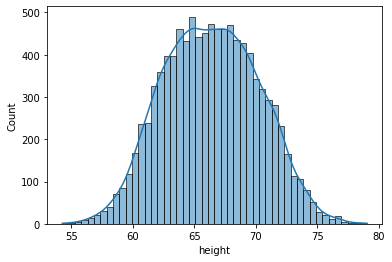

In [7]:
sns.histplot(df.height, kde=True)

In [5]:
# Mean of our height dataset
mean = df.height.mean()
mean

66.3675597548656

In [6]:
# Standard deviation of our dataset
std_dev = df.height.std()
std_dev

3.847528120795573

In [8]:
mean - 3*std_dev

54.824975392478876

In [9]:
mean + 3*std_dev

77.91014411725232

In [10]:
df[(df.height < 54.82) | (df.height > 77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [15]:
df_no_outlier = df[(df.height > 54.82) & (df.height < 77.91)]
df_no_outlier.shape

(9993, 2)

## Outlier removal using Z score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.


   


In [16]:
df['z_score'] = (df.height - df.height.mean())/df.height.std()
df.head()

,gender,height,z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [17]:
df[(df.z_score > 3.0) | (df.z_score < -3.0)]

,gender,height,z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [18]:
df_no_outlier = df[(df.z_score < 3.0) & (df.z_score > -3.0)]
df_no_outlier.shape

(9993, 3)


# Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/math-for-machine-learning/main/3_normal_distribution/Exercise/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [20]:
df.shape

(13200, 7)

In [22]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


Text(0, 0.5, 'count')

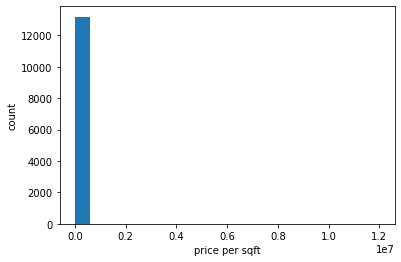

In [26]:
plt.hist(df.price_per_sqft, bins=20)
plt.xlabel('price per sqft')
plt.ylabel('count')

we can see that this data has some bad outliers, because we only see one bar with 12000 points, but on the right hand of the data there are lots of data but there value is negligible as compared to 12000, hence we hardly can see any bar.

**Using log scale to make visualization better**

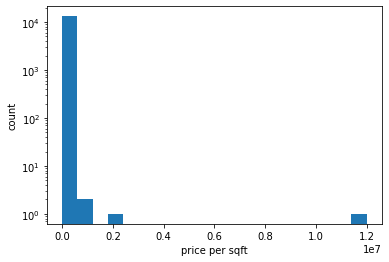

In [27]:
plt.hist(df.price_per_sqft, bins=20)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

## Treat Outlier Using Quantile

In [28]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [30]:
df[(df.price_per_sqft < lower_limit) | (df.price_per_sqft > upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000



Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [31]:
df2 = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]
df2.shape

(13172, 7)

## Outlier removal using standard deviation
Now we remove outliers which are more than 4 standard deviation from the mean

In [34]:
# mean of column price_per_sqft
mean = df2.price_per_sqft.mean()
mean

6663.6537351958705

In [35]:
std_dev = df2.price_per_sqft.std()
std_dev

4141.020700174605

In [37]:
max_limit = mean + 4*std_dev
min_limit = mean - 4*std_dev
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [38]:
df2[(df2.price_per_sqft < min_limit) | (df2.price_per_sqft > max_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [40]:
df_no_outliers = df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft < max_limit)]
df_no_outliers.shape

(13047, 7)

Text(0, 0.5, 'count')

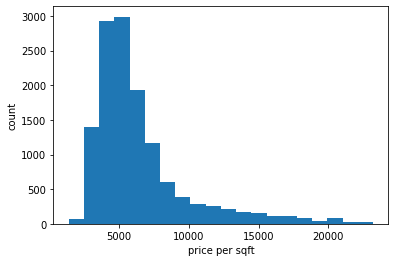

In [42]:
plt.hist(df_no_outliers.price_per_sqft, bins=20)
plt.xlabel('price per sqft')
plt.ylabel('count')